In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/cleaned/6.jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_in_euros,cost_of_living,purchasing_power,job_field
0,2023,Data DevOps Engineer,Data Engineering,Germany,2,4,1,Germany,L,87411,127.47,685.74,Data Engineering
1,2023,Data Architect,Data Architecture and Modeling,United States,3,4,3,United States,M,171120,143.34,1193.80,Data Engineering
2,2023,Data Architect,Data Architecture and Modeling,United States,3,4,3,United States,M,75256,143.34,525.02,Data Engineering
3,2023,Data Scientist,Data Science and Research,United States,3,4,3,United States,M,195040,143.34,1360.68,Data Science
4,2023,Data Scientist,Data Science and Research,United States,3,4,3,United States,M,85836,143.34,598.83,Data Science


#### Target feature - Skewness
Analysing the distribution of the target feature for skewness:

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

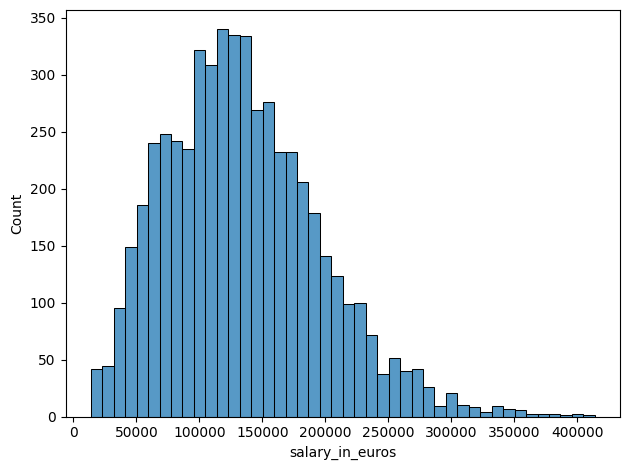

In [4]:
sns.histplot(df['salary_in_euros'])
plt.tight_layout()
plt.show()

In [5]:
df['salary_in_euros'].skew()

0.6567939038462222

There is some skewness in the target variable although it doesn't appear to be extreme.

#### Target feature - Outliers
Analysing the presence of outliers in the target feature:

/Users/tiagomartins/Desktop/Ironhack/Week_9/Final_project/pip/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


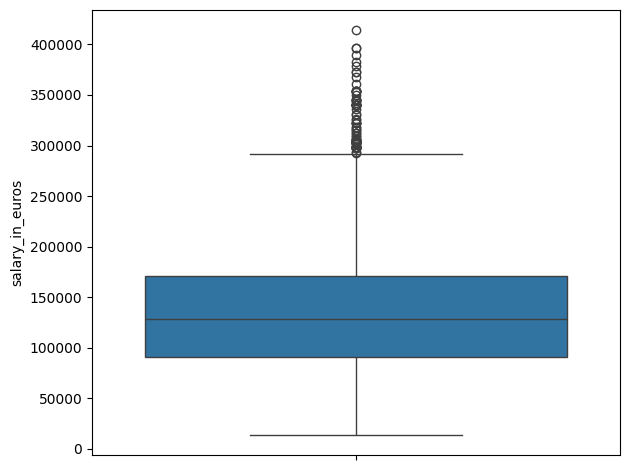

In [6]:
sns.boxplot(df['salary_in_euros'])
plt.tight_layout()
plt.show()

Although there's an isolated extreme value, it looks like it's a feasible result so I decided not to remove it.

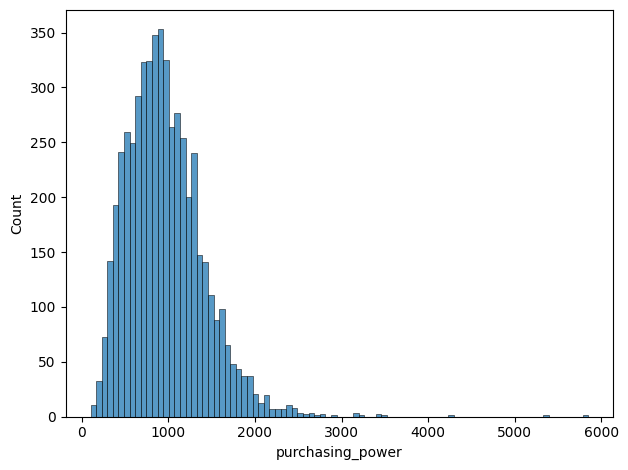

In [7]:
sns.histplot(df['purchasing_power'])
plt.tight_layout()
plt.show()

/Users/tiagomartins/Desktop/Ironhack/Week_9/Final_project/pip/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


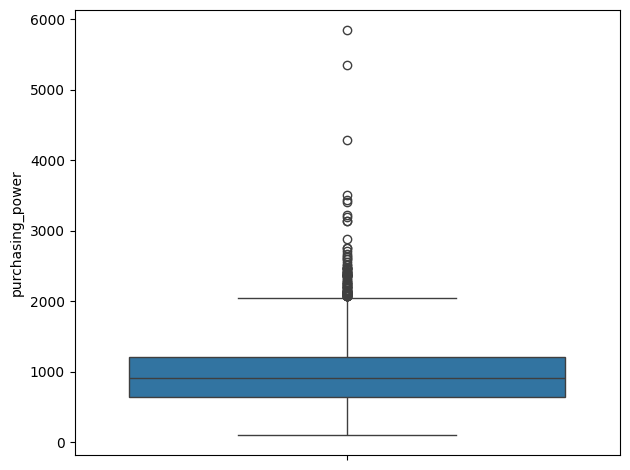

In [8]:
sns.boxplot(df['purchasing_power'])
plt.tight_layout()
plt.show()

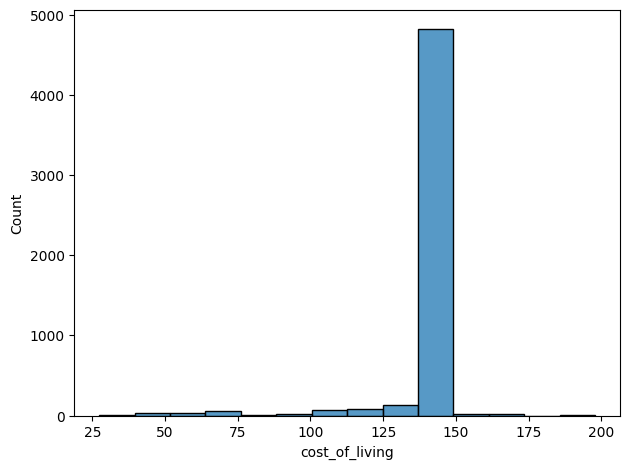

In [9]:
sns.histplot(df['cost_of_living'])
plt.tight_layout()
plt.show()

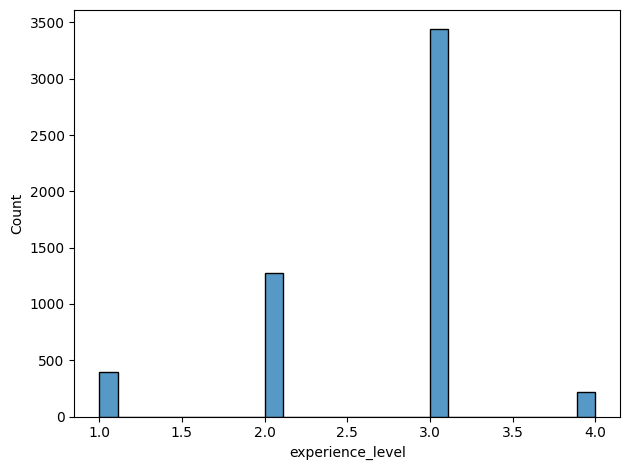

In [10]:
sns.histplot(df['experience_level'])
plt.tight_layout()
plt.show()

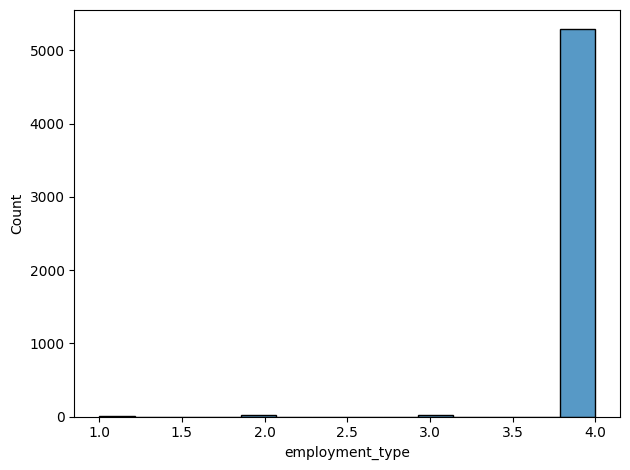

In [11]:
sns.histplot(df['employment_type'])
plt.tight_layout()
plt.show()

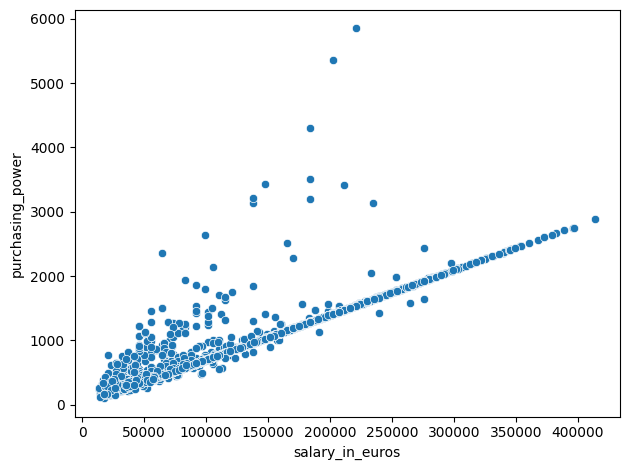

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has the columns 'salary_in_euros' and 'purchasing_power'
# Create a scatter plot
sns.scatterplot(x='salary_in_euros', y='purchasing_power', data=df)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

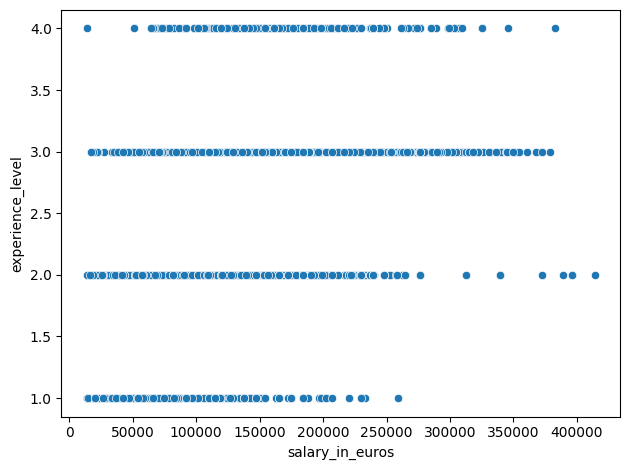

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has the columns 'salary_in_euros' and 'purchasing_power'
# Create a scatter plot
sns.scatterplot(x='salary_in_euros', y='experience_level', data=df)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

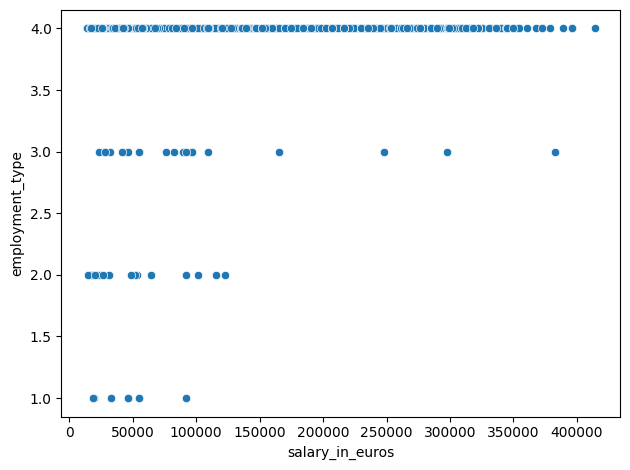

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has the columns 'salary_in_euros' and 'purchasing_power'
# Create a scatter plot
sns.scatterplot(x='salary_in_euros', y='employment_type', data=df)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
num_df = df.select_dtypes(np.number)
num_df

,work_year,experience_level,employment_type,work_setting,salary_in_euros,cost_of_living,purchasing_power
0,2023,2,4,1,87411,127.47,685.74
1,2023,3,4,3,171120,143.34,1193.80
2,2023,3,4,3,75256,143.34,525.02
3,2023,3,4,3,195040,143.34,1360.68
4,2023,3,4,3,85836,143.34,598.83
...,...,...,...,...,...,...,...
5325,2021,3,4,2,151800,143.34,1059.02
5326,2020,3,4,2,379040,143.34,2644.34
5327,2021,2,4,2,138920,143.34,969.16
5328,2020,1,4,2,96600,143.34,673.92


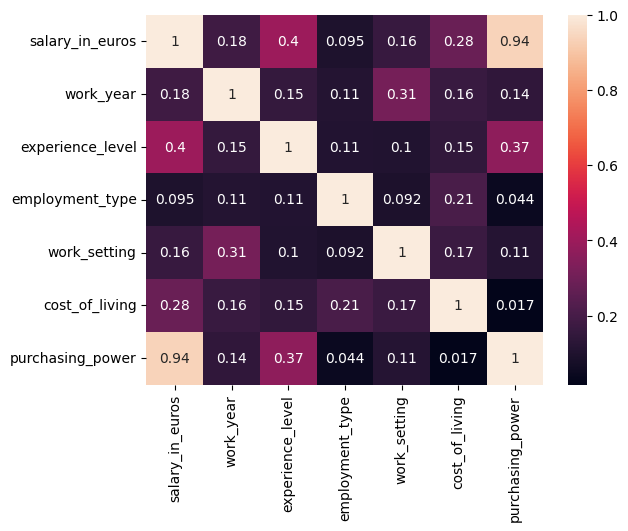

In [16]:
first_column = num_df.pop('salary_in_euros')
num_df.insert(0, 'salary_in_euros', first_column)

correlations_matrix = num_df.corr()
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()